In [2]:
import pandas as pd
# Creating a simple Series
data = [10,20,30,40]
series = pd.Series(data)
print(series)

print(series.index)


# User Defined:
series = pd.Series([10,20,30], index = ['a','b','c'])
print(series)

#datestime index
dates = pd.date_range('2023-01-01', periods=3)
series = pd.Series([10, 20, 30], index=dates)


print(series)
print(series.index)

series.index = ['x', 'y', 'z']
# For DataFrame
df = pd.DataFrame({'A': [1, 2]}, index=['row1', 'row2'])
df.reset_index(inplace=True)
# Converts the index into a column

0    10
1    20
2    30
3    40
dtype: int64
RangeIndex(start=0, stop=4, step=1)
a    10
b    20
c    30
dtype: int64
2023-01-01    10
2023-01-02    20
2023-01-03    30
Freq: D, dtype: int64
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03'], dtype='datetime64[ns]', freq='D')


In [14]:
pd.DataFrame({ 'Bob': ['I liked it', 'It was good'], 'Sue': ['Pretty good', 'Bland']})

pd.DataFrame({ 'Bob': ['I liked it', 'It was good'], 'Sue': ['Pretty good', 'Bland']}, index = ['product a', 'product b'])



,Bob,Sue
product a,I liked it,Pretty good
product b,It was good,Bland


In [18]:
data = {'Name': ['Alice', 'Bob', 'Charlie'], 'City':['New York', 'Kathmandu', 'Bhaktapur']}
df = pd.DataFrame(data)

df.to_csv('output.cvs', index = False)

In [32]:
data = {
'Name': ['Alice','Bob', 'Charlie'],
'Age': [25, 30, 35],
'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)
print(df)

#showing first 2 row only
print(df.head(2))

#showing last 2 row only
print(df.tail(2))

#taking info from dataframe
print(df.info())

#describing the data from dataframe
print(df.describe())

# Check dimensions of the DataFrame
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

# Access the ’Age’ column
print(f"Age \n")
print(df['Age'])

# Select rows by numerical index
print(f"\n rows by numerical index \n")
print(df.iloc[0])

# Select rows by condition
print(df.loc[df['Age']> 30])

      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   70000
    Name  Age  Salary
0  Alice   25   50000
1    Bob   30   60000
      Name  Age  Salary
1      Bob   30   60000
2  Charlie   35   70000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Salary  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 204.0+ bytes
None
        Age   Salary
count   3.0      3.0
mean   30.0  60000.0
std     5.0  10000.0
min    25.0  50000.0
25%    27.5  55000.0
50%    30.0  60000.0
75%    32.5  65000.0
max    35.0  70000.0
The DataFrame has 3 rows and 3 columns.
Age 

0    25
1    30
2    35
Name: Age, dtype: int64

 rows by numerical index 

Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object
      Name  Age  Salary
2  Charlie   35   70

In [38]:
data = {
'Name': ['Alice','Bob', 'Charlie'],
'Age': [25, 30, 35],
'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)

#specific data choose from row
filtered_data = df[df['Age'] > 30]
print(filtered_data)

#specific data choose from column
# Select only ’Name’ and ’Salary’ columns
selected_columns = df[['Name', 'Age']]
print(selected_columns)

# Drop the ’Salary’ column
print(" \n dropping salary column \n")

df_without_salary = df.drop(columns = ['Salary'])
print(df_without_salary)



      Name  Age  Salary
2  Charlie   35   70000
      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35
 
 dropping salary column 

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35


In [41]:
# Drop the row with index 1 (Bob)
df_without_row = df.drop(index=1)
print(df_without_row)


# Add a new column for Bonus
print("\n")
df['Bonus']= df['Salary'] * 0.5
print(df)

      Name  Age  Salary   Bonus
0    Alice   25   50000  5000.0
2  Charlie   35   70000  7000.0


      Name  Age  Salary    Bonus
0    Alice   25   50000  25000.0
1      Bob   30   60000  30000.0
2  Charlie   35   70000  35000.0


In [14]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
np.random.seed(42) # Introduce missing values randomly
mask = np.random.rand(*iris_df.shape) < 0.1 # 10%
iris_df[mask] = np.nan
print("Missing Values in Iris Dataset:")
print(iris_df.isnull().sum())






Missing Values in Iris Dataset:
sepal length (cm)    15
sepal width (cm)     15
petal length (cm)    19
petal width (cm)     15
target               19
dtype: int64


In [19]:
iris_df_ffill = iris_df.ffill()
iris_df_mean = iris_df.fillna(iris_df.mean())
iris_df_median = iris_df.fillna(iris_df.median())
iris_df_zero = iris_df.fillna(0)
# Expand iris_df with filled columns
iris_df_expanded = pd.concat([iris_df, iris_df_ffill.add_suffix('_ffill'), iris_df_mean.add_suffix('_mean'),iris_df_median.add_suffix('_median'),iris_df_zero.add_suffix('_zero')], axis=1)
# Display the head of the expanded DataFrame
print("\nDataset after Filling Missing Values:")
print(iris_df_expanded.head())


Dataset after Filling Missing Values:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               NaN                1.4               0.2   
2                NaN               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  sepal length (cm)_ffill  sepal width (cm)_ffill  \
0     0.0                      5.1                     3.5   
1     0.0                      4.9                     3.5   
2     0.0                      4.9                     3.2   
3     0.0                      4.6                     3.1   
4     0.0                      5.0                     3.6   

   petal length (cm)_ffill  petal width (cm)_ffill  target_ffill  ...  \
0                      1.4              

In [12]:
#df = pd.DataFrame({'Name': ['Alice ', 'Bob '], 'Age': [25, 30]})
#df['Name'] = df['Name'].str.strip()

#df = pd.DataFrame({'Age': [25, 30, 35]})
#df['Age'] = df['Age'].astype(int)


#df = pd.DataFrame({'Name': ['Alice ', 'Bob '], 'Age': [25, 30]})
#df = df.rename(columns={'Name' : 'Full Name', 'Age' : 'Years' })
#print(df)

df = df.rename(columns={'Name' : ['Alice', 'Bob', 'Alice'], 'Age' :[25,30,25] })
df = df.drop_duplicates()
print(df)

  Full Name  Years
0    Alice      25
1      Bob      30


In [15]:
data = {'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
'City': ['Kathmandu', 'Pokhara', 'Kathmandu', 'Pokhara'],
'Temperature': [15, 18, 16, 19]}

df = pd.DataFrame(data)

# Pivot: Reshape data to show cities as columns
pivoted_df = df.pivot(index='Date', columns = 'City', values = 'Temperature')
print(pivoted_df)

#---------------------------Melting-----------------------------------------
#---------------------------------------------------------------------------
# Melt: Convert wide data back to long format
melted_df = pd.melt(pivoted_df.reset_index(), id_vars = ['Date'], var_name = 'City', value_name ='Temperature')
print(melted_df)



City        Kathmandu  Pokhara
Date                          
2024-01-01         15       18
2024-01-02         16       19
         Date       City  Temperature
0  2024-01-01  Kathmandu           15
1  2024-01-02  Kathmandu           16
2  2024-01-01    Pokhara           18
3  2024-01-02    Pokhara           19


In [20]:
from sklearn.datasets import load_iris
iris = load_iris() # Load the Iris dataset
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])


# Min-Max Scaling using Pandas
iris_minmaxScaled = (iris_df - iris_df.min()) / (iris_df.max() - iris_df.min())

print("Original Iris DataFrame:")
print(iris_df.head())

print("\nMin-Max Scaled Iris DataFrame:")
print(iris_minmaxScaled.head()) # Display scaled data

Original Iris DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Min-Max Scaled Iris DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667


In [21]:
df = pd.DataFrame({'Category': ['Low', 'Medium', 'High','Low', 'High']})
# Ordinal encoding using map
ordinal_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Category_Ordinal'] = df['Category'].map(ordinal_mapping)
print(df)

  Category  Category_Ordinal
0      Low                 1
1   Medium                 2
2     High                 3
3      Low                 1
4     High                 3


In [22]:
df_municipalities = pd.DataFrame({'Municipality': ['Kathmandu', 'Bhaktapur', 'Lalitpur', 'Madhyapur Thimi', 'Kirtipur']})
one_hot_encoding = pd.get_dummies(df_municipalities['Municipality'], prefix ='Municipality')
df_encoded = pd.concat([df_municipalities, one_hot_encoding], axis=1)
print(df_encoded)# Display the result

      Municipality  Municipality_Bhaktapur  Municipality_Kathmandu  \
0        Kathmandu                   False                    True   
1        Bhaktapur                    True                   False   
2         Lalitpur                   False                   False   
3  Madhyapur Thimi                   False                   False   
4         Kirtipur                   False                   False   

   Municipality_Kirtipur  Municipality_Lalitpur  Municipality_Madhyapur Thimi  
0                  False                  False                         False  
1                  False                  False                         False  
2                  False                   True                         False  
3                  False                  False                          True  
4                   True                  False                         False  


In [26]:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 88]})

# Inner joining bicho ko matching key ko matrai dinxa
inner_merge = pd.merge(df1, df2, on= 'ID', how = 'inner')
print(inner_merge)

# Left join
left_merge = pd.merge(df1, df2, on= 'ID', how = 'left')
print(left_merge)

# outer join
outer_merged = pd.merge(df1, df2, on='ID', how='outer')
print("\nOuter Join:")
print(outer_merged)

   ID     Name  Score
0   2      Bob     85
1   3  Charlie     90
   ID     Name  Score
0   1    Alice    NaN
1   2      Bob   85.0
2   3  Charlie   90.0

Outer Join:
   ID     Name  Score
0   1    Alice    NaN
1   2      Bob   85.0
2   3  Charlie   90.0
3   4      NaN   88.0


In [23]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
# Row-wise concatenation
combined_rows = pd.concat([df1, df2], axis=0)
print("Row-wise concatenation:")
print(combined_rows)
# Column-wise concatenation
combined_cols = pd.concat([df1, df2], axis=1)
print("\nColumn-wise concatenation:")
print(combined_cols)

Row-wise concatenation:
   A  B
0  1  3
1  2  4
0  5  7
1  6  8

Column-wise concatenation:
   A  B  A  B
0  1  3  5  7
1  2  4  6  8


In [41]:
#task 1
df = pd.read_csv('/content/drive/My Drive/bank.csv')
checking_dtypeobj = df.select_dtypes(include=['object']).columns
print(checking_dtypeobj)

#unique values of that column
unique_valuesJob = df['job'].unique()
print(unique_valuesJob)

unique_valuesMarital = df['marital'].unique()
print(unique_valuesMarital)


unique_valuesE = df['education'].unique()
print(unique_valuesE)


unique_valuesD = df['default'].unique()
print(unique_valuesD)


unique_valuesH = df['housing'].unique()
print(unique_valuesH)

unique_valuesL = df['loan'].unique()
print(unique_valuesL)

unique_valuesC = df['contact'].unique()
print(unique_valuesC)

unique_valuesM = df['month'].unique()
print(unique_valuesM)

unique_valuesP = df['poutcome'].unique()
print(unique_valuesP)

unique_valuesY = df['y'].unique()
print(unique_valuesY)


null_values = df.isnull().sum()
print(null_values)


#drooping all the column and storing into new dataframe

new_df = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'], axis=1)

new_df.to_csv('banknumericdata.csv', index=False)

df2 = pd.read_csv('banknumericdata.csv')

print("\n Q4 descibe with stats")
print(df2.describe())


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 Q4 descibe with stats
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  4

In [56]:
#task-2
df = pd.read_csv('/content/drive/My Drive/medical_students_dataset.csv')
df_info = df.info()
#checking whether there is null value or not
df_null = df.isnull().sum()



#filling the value within the missing value
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Temperature']= df['Temperature'].fillna(df['Temperature'].mean())
df['Heart Rate']= df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Blood Pressure']= df['Blood Pressure'].fillna(df['Blood Pressure'].mean())

#using mean beacuse it gives us overall average  data ko result dinxa



df['Height']= df['Height'].fillna(df['Height'].median())
df['Weight']= df['Weight'].fillna(df['Weight'].median())
df['Cholesterol']= df['Cholesterol'].fillna(df['Cholesterol'].median())


#using meadian because middle result dinxa yesle

df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['BMI']= df['BMI'].fillna(df['BMI'].mode()[0])
df['Blood Type']= df['Blood Type'].fillna(df['Blood Type'].mode()[0])
df['Diabetes']= df['Diabetes'].fillna(df['Diabetes'].mode()[0])
df['Smoking']= df['Smoking'].fillna(df['Smoking'].mode()[0])


#mode use chahi kina gareko bhanda it gives us common value dinxa tesaile





print(df_null)


#checking the duplicate value in dataframe
duplicates = df.duplicated().sum()
print("total number of dupli : ", duplicates)

dropping_dupli = df.drop_duplicates()
print(dropping_dupli)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

In [73]:
#task3
df = pd.read_csv('/content/drive/My Drive/Titanic-Dataset.csv')
#subset_dataframe = pd.DataFrame([['Name'], ['PClass'], ['Sex'], ['Age'], ['Fare'], ['Survived']])
subset_df = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
print(df)

# yesle chahi filter garxa ani only the rows where Pclass = 1 bhako lai rakhxa
first_class_df = subset_df[subset_df['Pclass'] == 1]


print("Mean : ", first_class_df['Fare'].mean())
print("Median : ", first_class_df['Fare'].median())
print("Max : ", first_class_df['Fare'].max())
print("Min: ", first_class_df['Fare'].min())

#null values in my age data

null_values = first_class_df['Age'].isnull().sum()
print("Null values: ", null_values)

dropped = df.dropna(subset=['Age'])
print(dropped)


embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(columns = 'Embarked')
print(df.head())






     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

KeyError: ['Embarked']

Mean survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


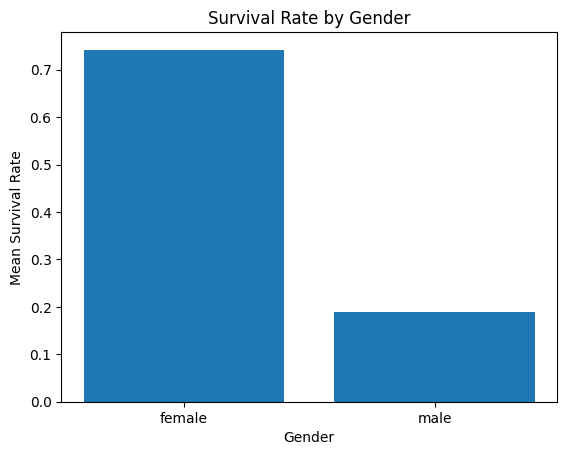

In [71]:
import matplotlib.pyplot as plt

mean_survival = df.groupby('Sex')['Survived'].mean()
print("Mean survival rate by Sex:")
print(mean_survival)


plt.bar(mean_survival.index, mean_survival.values)

plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.title('Survival Rate by Gender')
plt.show()

/tmp/ipython-input-2723401232.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Survival rate by Pclass and Age Group:
Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


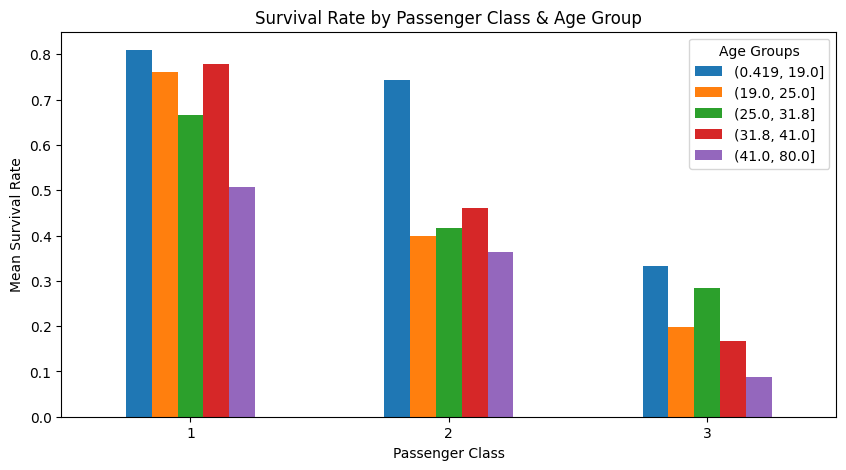

In [76]:
df = df.dropna(subset=['Age'])


df['AgeGroup'] = pd.qcut(df['Age'], 5)

survival_rate = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print("Survival rate by Pclass and Age Group:")
print(survival_rate)


plot_data = survival_rate.unstack()


plot_data.plot(kind='bar', figsize=(10,5))

plt.title("Survival Rate by Passenger Class & Age Group")
plt.xlabel("Passenger Class")
plt.ylabel("Mean Survival Rate")
plt.xticks(rotation=0)
plt.legend(title="Age Groups")

plt.show()